In [92]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


In [93]:
x_max = 100.0
y_max = 10.0
x, y = np.meshgrid(np.linspace(0, x_max, 500), np.linspace(0, y_max, 50))
z_sin = 1.0 + np.sin(0.5*np.pi*x)*np.sin(0.5*np.pi*y)
z_cos = 1.0 + np.cos(0.5*np.pi*x)*np.cos(0.5*np.pi*y)


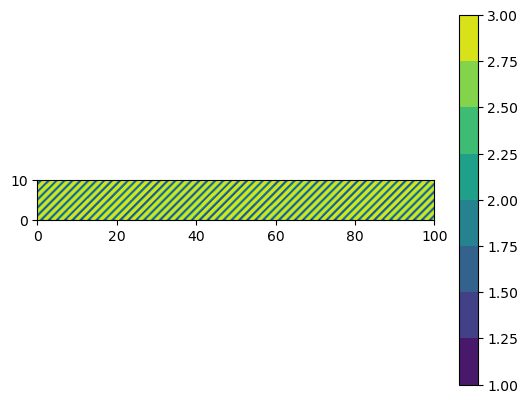

In [91]:
h = plt.contourf(x, y, z_sin+z_cos)
plt.axis('scaled')
plt.colorbar()
plt.savefig('fig.pdf')


In [59]:
z_cos_grad = np.gradient(z_cos)
z_sin_grad = np.gradient(z_sin)
z_grad = np.gradient(z_sin+z_cos)


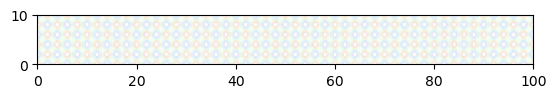

In [60]:
magnitude = np.hypot(*z_cos_grad)

# Plotting gradient & contour:
fig, axe = plt.subplots()
axe.contour(x, y, z_cos, 10, cmap="jet", linewidths=0.05)
axe.quiver(x, y, 2.0*z_cos_grad[1], 2.0*z_cos_grad[0], magnitude, cmap="binary", units='xy', pivot='tail', width=0.01, scale=5)
axe.set_aspect("equal")  # Don't stretch the scale
plt.savefig('fig_cos_grad.pdf')


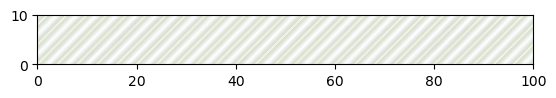

In [61]:
magnitude = np.hypot(*z_grad)

# Plotting gradient & contour:
fig, axe = plt.subplots()
axe.contour(x, y, z_sin+z_cos, 10, cmap="binary", linewidths=0.05)
axe.quiver(x, y, 5.0*z_grad[1], 5.0*z_grad[0], magnitude, cmap="viridis", units='xy', pivot='tail', width=0.01, scale=5)
axe.set_aspect("equal")  # Don't stretch the scale
plt.savefig('fig_grad.pdf')


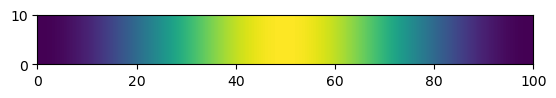

In [119]:
fig, ax = plt.subplots()

def f(x, y, t):
    # return 2000.0 * (x**2 + y**2) / (x_max**2 + y_max**2) + 500.0 * np.sin(0.5 * np.pi * t + 2.0 * np.pi * (x**2 + y**2) / (x_max**2 + y_max**2))
    return 2000.0 + 100.0 * np.sin(0.5 * np.pi * t + 2.0 * np.pi * (x / x_max))

# x = np.linspace(0, 2 * np.pi, 120)
# y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(60):
    im = ax.imshow(f(x, y, i), animated=True, extent=(0, x_max, 0, y_max))
    if i == 0:
        ax.imshow(f(x, y, 0))  # show an initial one first
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=20, blit=True,
                                repeat_delay=1000)


# To save the animation using Pillow as a gif
writer = animation.PillowWriter(fps=15,
                                metadata=dict(artist='Me'),
                                bitrate=1800)
ani.save('temperature.gif', writer=writer)

plt.show()


In [ ]:

from IPython.display import Image, display

filename = 'temperature.gif'

display(Image(filename))
